In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [5]:
x_train[0].max()

255

In [6]:
import matplotlib.pyplot as plt

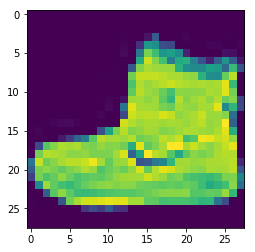

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [11]:
x_train.shape

(60000, 28, 28)

In [18]:
tr_size = 60000
ts_size = 10000
length = 28
width = 28
color_channel = 1

In [19]:
x_train = x_train.reshape(tr_size, length, width, color_channel)

In [17]:
x_test.shape

(10000, 28, 28)

In [20]:
x_test = x_test.reshape(ts_size, length, width, color_channel)

In [21]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [22]:
y_train.shape

(60000,)

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
num_classes = 10

In [25]:
y_cat_tr = to_categorical(y_train, num_classes= num_classes)

In [26]:
y_cat_ts = to_categorical(y_test, num_classes= num_classes)

In [27]:
y_cat_tr.shape

(60000, 10)

In [28]:
from keras.models import Sequential

In [30]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [41]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [46]:
from tensorflow.keras.callbacks import EarlyStopping

In [47]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [48]:
model.fit(x_train, y_cat_tr, epochs=10, verbose=1, validation_data=(x_test,y_cat_ts), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.3201 - accuracy: 0.8854 - val_loss: 0.3157 - val_accuracy: 0.8848
Epoch 2/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2564 - accuracy: 0.9057 - val_loss: 0.2764 - val_accuracy: 0.8993
Epoch 3/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.2188 - accuracy: 0.9189 - val_loss: 0.2609 - val_accuracy: 0.9076
Epoch 4/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1874 - accuracy: 0.9311 - val_loss: 0.2593 - val_accuracy: 0.9091
Epoch 5/10
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1633 - accuracy: 0.9393 - val_loss: 0.2676 - val_accuracy: 0.9111
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1400 - accuracy: 0.9477 - val_loss: 0.2666 - val_accuracy: 0.9150


Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1802 - acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1679 - acc: 0.9395
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.1579 - acc: 0.9439
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1502 - acc: 0.9469
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1427 - acc: 0.9496
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1397 - acc: 0.9523
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.1312 - acc: 0.9551
Epoch 8/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.1274 - acc: 0.9559
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1238 - acc: 0.9582
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1201 - acc: 0.9588

In [51]:
model.metrics_names

['loss', 'accuracy']

In [54]:
import pandas as pd

In [56]:
df= pd.DataFrame(model.history.history)

In [57]:
df

,val_loss,val_accuracy,loss,accuracy
0,0.315656,0.8848,0.320101,0.885367
1,0.276355,0.8993,0.256361,0.905750
2,0.260850,0.9076,0.218799,0.918850
3,0.259307,0.9091,0.187399,0.931050
4,0.267626,0.9111,0.163277,0.939317
5,0.266592,0.9150,0.140032,0.947700


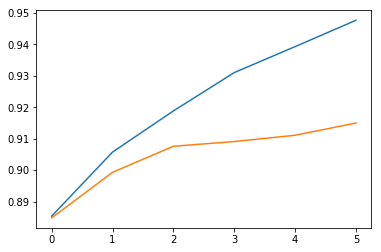

In [59]:
plt.plot(df.accuracy)
plt.plot(df.val_accuracy)

In [61]:
pred= model.predict_classes(x_test)

In [62]:
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [63]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.88      0.84      0.86      1000
           3       0.90      0.93      0.92      1000
           4       0.83      0.90      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.76      0.77      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000

